This is sudo code for feature selection. The final version will be applied on the BTS dataset joined with FAA dataset.

In [22]:
import pandas as pd
import sqlite3
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### Select columns based on EDA results and domain knowledge

In [2]:
columns = ['Year',
           'Quarter',
           'Month',
           'DayofMonth',
           'DayOfWeek',
           #'FlightDate',# can remove?
           #'Reporting_Airline',# can remove?
           #'DOT_ID_Reporting_Airline',# can remove?
           'IATA_CODE_Reporting_Airline',
           'Tail_Number',
           'Flight_Number_Reporting_Airline',
           'OriginAirportID',
           'OriginAirportSeqID',
           'OriginCityMarketID',
           #'Origin',
           #'OriginCityName',
           #'OriginState',
           #'OriginStateFips',
           #'OriginStateName',
           #'OriginWac',
           'DestAirportID',
           'DestAirportSeqID',
           'DestCityMarketID',
           #'Dest',
           #'DestCityName',
           #'DestState',
           #'DestStateFips',
           #'DestStateName',
           #'DestWac',
           'CRSDepTime',        #hhmm
           'DepTime',        #hhmm
           'DepDelay',
           'DepDelayMinutes',
           'DepDel15',          #binary
           'DepartureDelayGroups',
           'DepTimeBlk',
           'TaxiOut',
           'WheelsOff',        #hhmm
           'WheelsOn',        #hhmm
           'TaxiIn',
           'CRSArrTime',        #hhmm
           'ArrTime',        #hhmm
           'ArrDelay',
           'ArrDelayMinutes',
           'ArrDel15',         #binary
           'ArrivalDelayGroups',
           'ArrTimeBlk',
           'Cancelled',        #binary
           #'CancellationCode',
           'Diverted',          #binary
           'CRSElapsedTime',
           'ActualElapsedTime',
           'AirTime',
           'Flights',
           'Distance',
           'DistanceGroup',
           'CarrierDelay',
           'WeatherDelay',
           'NASDelay',
           'SecurityDelay',
           'LateAircraftDelay',
           'DivAirportLandings'
          ]
airlines = ['AA',
            'AS',
            'B6',
            'DL',
            'F9',
            'HA',
            'MQ',
            'NK',
            'OO',
            'UA',
            'WN',
            '9E',
            'G4',
            'OH',
            'YX'
           ]
ceased_airlines = ['US',
                   'VX',
                   'QX',
                   'EV',
                   'YV'
                  ]

In [7]:
'''
# select columns and airlines based on EDA results. It takes about 22 minutes
start_time = time.time()

# Import the combined dataset from sqlite.
connection = sqlite3.connect('/home/ccecilia/Downloads/bts_on_time.db')
cursor = connection.cursor()

column_names = ', '.join(columns)
placeholders = ', '.join(['?'] * len(airlines))
sql_query = f"SELECT {column_names} FROM on_time WHERE IATA_CODE_Reporting_Airline IN ({placeholders}) AND Year!='2020';"
cursor.execute(sql_query,tuple(airlines))
on_time_clean = pd.DataFrame(cursor.fetchall(), columns=columns)

# Close the cursor and connection
cursor.close()
connection.close()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
'''

Elapsed time: 1030.1554 seconds


In [8]:
#'''
on_time_clean.to_csv('on_time_clean_org.csv', index=False)
#'''

## Automated Feature Selection with AutoFeatSelect
https://python.plainenglish.io/automated-feature-selection-for-machine-learning-in-python-2ad4bcfac19a

In [3]:
#!pip install autofeatselect
from autofeatselect import CorrelationCalculator, FeatureSelector, AutoFeatureSelect

In [4]:
on_time_clean = pd.read_csv('on_time_clean_org.csv')

In [5]:
# len 46
on_time_clean.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'CRSDepTime', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DivAirportLandings'],
      dtype='object')

In [16]:
num_feats = ['Year', 
             'Quarter', 
             'Month', 
             'DayofMonth', 
             'DayOfWeek',
             'CRSDepTime', #hhmm
             'DepTime', #hhmm
             'DepDelay', 
             'DepDelayMinutes', 
             'DepartureDelayGroups',
             'TaxiOut', 
             'WheelsOff', #hhmm
             'WheelsOn', #hhmm
             'TaxiIn',
             'CRSArrTime',#hhmm
             'ArrTime', #hhmm
             'ArrDelay', 
             'ArrDelayMinutes',
             'ArrivalDelayGroups',
             'CRSElapsedTime', 
             'ActualElapsedTime', 
             'AirTime', 
             'Flights', 
             'Distance',
             'DistanceGroup',
             #'CarrierDelay',
             #'WeatherDelay',
             #'NASDelay',
             #'SecurityDelay', 
             #'LateAircraftDelay',
             'DivAirportLandings'
            ]#26 cols

In [17]:
cat_feats = ['IATA_CODE_Reporting_Airline',
             'Tail_Number',
             'Flight_Number_Reporting_Airline',
             'OriginAirportID',
             'OriginAirportSeqID',
             'OriginCityMarketID',
             'DestAirportID',
             'DestAirportSeqID',
             'DestCityMarketID',
             'DepDel15', #binary
             'DepTimeBlk',
             'ArrDel15', #binary
             'ArrTimeBlk'
             #'Cancelled', #binary
             #'Diverted' #binary
             
            ]#13 cols

In [14]:
# select flights that are not cancelled and not diverted
#on_time_corr = on_time_clean[(on_time_clean['Cancelled'] == '0') & (on_time_clean['Diverted'] == '0')] #use this line for importing data set from sqlite.
on_time_corr = on_time_clean[(on_time_clean['Cancelled'] == 0) & (on_time_clean['Diverted'] == 0)] #use this line after importing the csv
on_time_corr = on_time_corr.copy()

# create delay label based on a delay reason. There are five delay reasons in the dataset, 
# and they are marked only for delayed flights.
#on_time_corr.loc[:, 'delay_label'] = np.where(on_time_corr['CarrierDelay'] == '', 0, 1)
on_time_corr['delay_label'] = np.where(on_time_corr['CarrierDelay'].notnull(), 1, 0) #use this line after importing the csv
on_time_corr['delay_label'].value_counts()

0    35143973
1     8167503
Name: delay_label, dtype: int64

In [19]:
for c in cat_feats:
    if on_time_corr[c].dtype != 'object':
        on_time_corr[c] = on_time_corr[c].astype('object')
        
on_time_corr[cat_feats].dtypes

IATA_CODE_Reporting_Airline        object
Tail_Number                        object
Flight_Number_Reporting_Airline    object
OriginAirportID                    object
OriginAirportSeqID                 object
OriginCityMarketID                 object
DestAirportID                      object
DestAirportSeqID                   object
DestCityMarketID                   object
DepDel15                           object
DepTimeBlk                         object
ArrDel15                           object
ArrTimeBlk                         object
dtype: object

In [20]:
for c in num_feats:
    if not pd.api.types.is_numeric_dtype(on_time_corr[c].dtype):
        on_time_corr[c] = pd.to_numeric(on_time_corr[c], errors='coerce')
        
on_time_corr[num_feats].dtypes

Year                      int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
CRSDepTime                int64
DepTime                 float64
DepDelay                float64
DepDelayMinutes         float64
DepartureDelayGroups    float64
TaxiOut                 float64
WheelsOff               float64
WheelsOn                float64
TaxiIn                  float64
CRSArrTime                int64
ArrTime                 float64
ArrDelay                float64
ArrDelayMinutes         float64
ArrivalDelayGroups      float64
CRSElapsedTime          float64
ActualElapsedTime       float64
AirTime                 float64
Flights                   int64
Distance                  int64
DistanceGroup             int64
DivAirportLandings      float64
dtype: object

In [23]:
X_train, X_test, y_train, y_test = train_test_split(on_time_corr[num_feats+cat_feats],
                                                    on_time_corr['delay_label'],
                                                    test_size=0.2,
                                                    random_state=42)

In [24]:
'''
# select columns and airlines based on EDA results. It takes about 1-2 hours
start_time = time.time()

#Static features will not be removed even if they are correlated with other features.
static_features = ['IATA_CODE_Reporting_Airline', 'col2','col3']

corr_df_num, num_remove_list = CorrelationCalculator.numeric_correlations(X_train,
                                                                          features=num_feats,
                                                                          static_features=None,
                                                                          threshold=0.9)

corr_df_cat, cat_remove_list = CorrelationCalculator.categorical_correlations(X_train,
                                                                              features=cat_feats,
                                                                              static_features=None,
                                                                              threshold=0.9)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
'''

In [25]:
num_remove_list

['DepDelay',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'ArrDelay',
 'DepDelayMinutes',
 'AirTime',
 'Quarter',
 'DepTime',
 'WheelsOn',
 'CRSDepTime',
 'DepartureDelayGroups']

In [26]:
cat_remove_list

['IATA_CODE_Reporting_Airline',
 'OriginAirportID',
 'OriginCityMarketID',
 'DestAirportID',
 'DestCityMarketID']

In [27]:
#Remove correlated features
num_feats = [c for c in num_feats if c not in num_remove_list]
cat_feats = [c for c in cat_feats if c not in cat_remove_list]

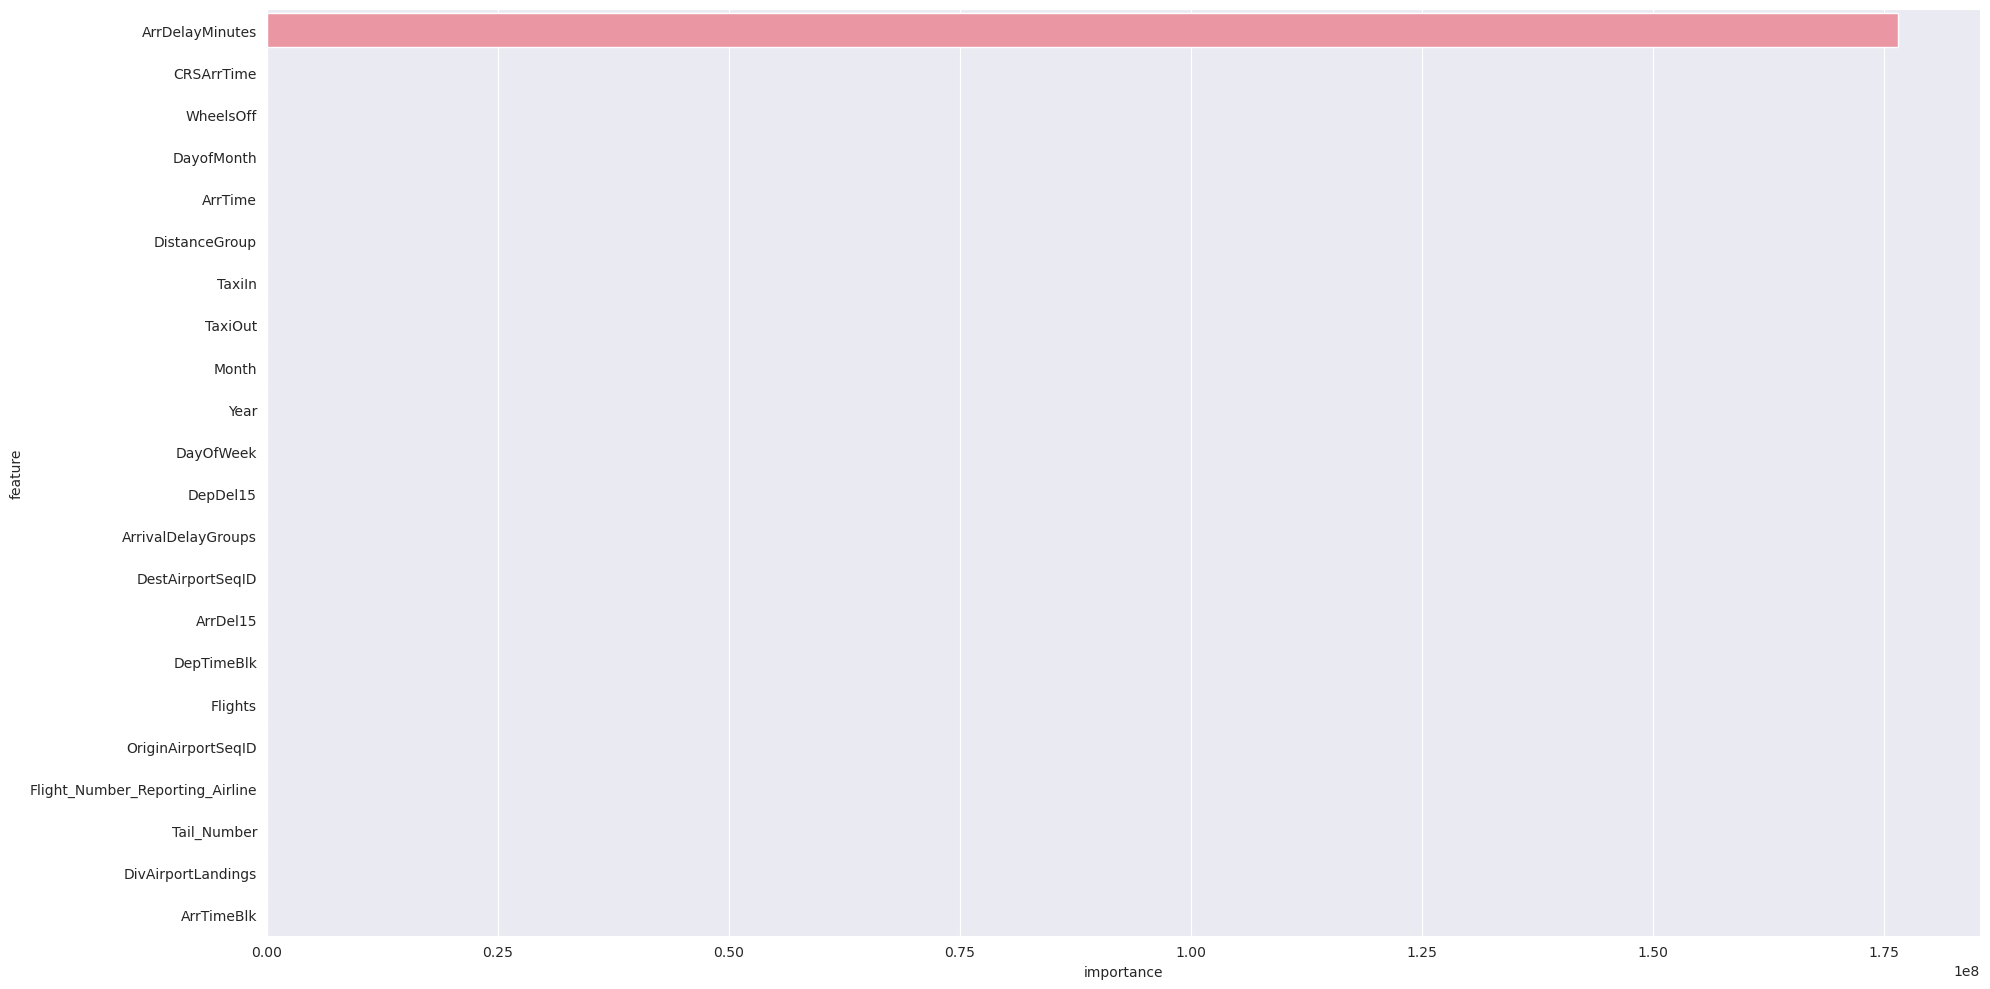

Elapsed time: 624.1980 seconds


In [28]:
#Create Feature Selector Object. It takes about hours.
start_time = time.time()

feat_selector = FeatureSelector(modeling_type='classification',
                                X_train=X_train, y_train=y_train,
                                X_test=X_test, y_test=y_test,
                                numeric_columns=num_feats,
                                categorical_columns=cat_feats,
                                seed=24)

#Note: Hyperparameters and objective function of LightGBM can be changed.
lgbm_importance_df = feat_selector.lgbm_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

In [30]:
lgbm_importance_df.to_csv('lgbm_importance_df.csv', index=False)